# Heroes of Pymoli Analysis

In [2]:
# Dependencies
import pandas as pd

In [3]:
# Read data to pandas DF
income_file = "Resources/purchase_data.csv"
original_purchase_df = pd.read_csv(income_file)

## Total Number of Players

In [4]:
# Get a number of total players
total_players = len(original_purchase_df["SN"].unique())
print('Number of total players is ', total_players)

Number of total players is  576


## Total Purchasing Analysis 

**ToDo**
* Find a total number of unique items 
* Find an average purchase price per item
* Find a total number of purchases that were made
* Find a total amount of revenue

#### Total number of unique items

In [9]:
number_of_unique_items = len(original_purchase_df["Item ID"].unique())
print(f'Total number of unique items available for purchase: {number_of_unique_items}')

Total number of unique items available for purchase: 179


#### Average purchase price per item

In [10]:
avg_item_price = round(original_purchase_df["Price"].mean(), 2)
print(f'Average price per item: ${avg_item_price}')

Average price per item: $3.05


#### Total number of purchase were made

In [11]:
total_purchases = original_purchase_df["Purchase ID"].count()
print(f'Total number of items were purchased: {total_purchases}')

Total number of items were purchased: 780


#### Total revenue amount

In [12]:
total_revenue = original_purchase_df["Price"].sum()
print(f'Total revenue amount: ${total_revenue}')

Total revenue amount: $2379.77


#### Summary DF

In [15]:
summary_purchase_df = pd.DataFrame({"Number of Unique Items": number_of_unique_items
                                   ,"Average Price": f'${avg_item_price}'
                                   ,"Amount of Purchases": total_purchases
                                   , "Total Revenue": '${:,}'.format(total_revenue)}, index=[0])
summary_purchase_df

,Number of Unique Items,Average Price,Amount of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics Analysis

**ToDo**
* Find percentage and count of male players
* Find percentage and count of female players
* Find percentage and count of other / non-disclosed

In [17]:
# group unique players by gender
players_by_gender = original_purchase_df.groupby(["Gender"])["SN"].unique()

#### Count of Male, Female and Other/non-disclosed players

In [18]:
count_male_players = len(players_by_gender["Male"])
count_female_players = len(players_by_gender["Female"])
count_other_players = len(players_by_gender["Other / Non-Disclosed"])

print(f'Count of Male Players: {count_male_players}')
print(f'Count of Female Players: {count_female_players}')
print(f'Count of Other / Non-Disclosed: {count_other_players}')

Count of Male Players: 484
Count of Female Players: 81
Count of Other / Non-Disclosed: 11


#### Percent of Male, Female and Other/non-disclosed players

In [19]:
percent_male_players = round((count_male_players / total_players) * 100, 2)
percent_female_players = round((count_female_players / total_players) * 100, 2)
percent_other_players = round((count_other_players / total_players) * 100, 2)

print(f'Percent of Male Players: {percent_male_players}%')
print(f'Percent of Female Players: {percent_female_players}%')
print(f'Percent of Other / Non-Disclosed: {percent_other_players}%')

Percent of Male Players: 84.03%
Percent of Female Players: 14.06%
Percent of Other / Non-Disclosed: 1.91%


#### Summary Gender Demographics DF

In [21]:
gender_demographics_df = pd.DataFrame({"Count of Players": [count_male_players
                                                            ,count_female_players
                                                            ,count_other_players]
                                      ,"Percent of Players": [f'{percent_male_players}%'
                                                              ,f'{percent_female_players}%'
                                                              ,f'{percent_other_players}%']}
                                      , index=["Male", "Female", "Other/Non-Disclosed"])

gender_demographics_df

,Count of Players,Percent of Players
Male,484,84.03%
Female,81,14.06%
Other/Non-Disclosed,11,1.91%


#### Pie Chart for Gender Demographics Distribution 

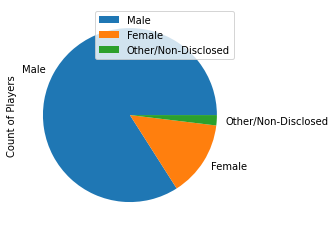

In [36]:
plot = gender_demographics_df.plot.pie(y = "Count of Players")

## Purchasing Analysis by Gender

**ToDo**
The below each should be broken by gender:
* Find count of purchase 
* Find average purchase price
* Find total purchase value
* Find average purchase total per person 

#### Count of Purchase by Gender

In [37]:
purchase_count_by_gender = original_purchase_df.groupby(["Gender"])["Purchase ID"].count()
purchase_count_by_gender

Gender
Female                   113
Male                     652
Other / Non-Disclosed     15
Name: Purchase ID, dtype: int64

#### Average Purchase Price by Gender

In [39]:
avg_purchase_price_by_gender = round(original_purchase_df.groupby(["Gender"])["Price"].mean(), 2)
avg_purchase_price_by_gender

Gender
Female                   3.20
Male                     3.02
Other / Non-Disclosed    3.35
Name: Price, dtype: float64

#### Total Purchase Value by Gender

In [40]:
total_purchase_value_by_gender = round(original_purchase_df.groupby(['Gender'])['Price'].sum(), 2)
total_purchase_value_by_gender

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

#### Average Purchase Total per Person by Gender

In [41]:
# Male
avg_purchase_per_person_by_male = round(total_purchase_value_by_gender['Male']/count_male_players, 2)
# Female
avg_purchase_per_person_by_female = round(total_purchase_value_by_gender['Female']/count_female_players, 2)
# Other
avg_purchase_per_person_by_other = round(total_purchase_value_by_gender['Other / Non-Disclosed']/count_other_players, 2)

avg_purchase_per_person = pd.Series({'Male': avg_purchase_per_person_by_male
                                     ,'Female': avg_purchase_per_person_by_female
                                     ,'Other / Non-Disclosed': avg_purchase_per_person_by_other})

avg_purchase_per_person

Male                     4.07
Female                   4.47
Other / Non-Disclosed    4.56
dtype: float64

#### Summary Gender Purchasing Analysis DF

In [42]:
gender_purchasing_analysis_df = pd.DataFrame({'Purchase count': purchase_count_by_gender
                                               ,'Avg Purchase Price': avg_purchase_price_by_gender
                                               ,'Total Purchase Value': total_purchase_value_by_gender
                                               ,'Avg Total Purchase per Person': avg_purchase_per_person})

for col in gender_purchasing_analysis_df.columns:
    if col != 'Purchase count':
        gender_purchasing_analysis_df[col] = gender_purchasing_analysis_df[col].map("${: ,}".format)

gender_purchasing_analysis_df


,Purchase count,Avg Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Female,113,$ 3.2,$ 361.94,$ 4.47
Male,652,$ 3.02,"$ 1,967.64",$ 4.07
Other / Non-Disclosed,15,$ 3.35,$ 50.19,$ 4.56


In [45]:
gender_purchasing_analysis_df.index

Index(['Female', 'Male', 'Other / Non-Disclosed'], dtype='object')

#### Bar plot for Gender Purchasing Analysis

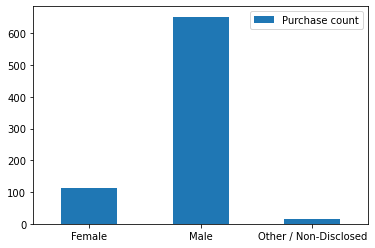

In [48]:
bar_plot = gender_purchasing_analysis_df.plot.bar(rot=0)

## Age Demographics

**ToDo**

The below each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.):

* Find total player count
* Find percentage of players

#### Find youngest and eldest player

In [55]:
youngest = original_purchase_df['Age'].min()
eldest = original_purchase_df['Age'].max()

print(f'Age of youngest player: {youngest}')
print(f'Age of aldest player: {eldest}')

Age of youngest player: 7
Age of aldest player: 45


#### Cut data by age 

In [56]:
# create bins and name for age groups
bins = [0, 9, 14, 19,  24, 29, 34, 39, 46]
group_names = ["<10", "10 - 14", "15 - 19", "20 - 24", "25 - 29", "30 - 34", "35 - 40", "40+"]

# Copy original df to a new one 
age_demog_df = original_purchase_df.copy()

# cut data by age and put label (group name) to new column according the bins
age_demog_df['Age Ranges'] = pd.cut(age_demog_df['Age'], bins, labels=group_names, include_lowest=True)

#### Find total count and persent of players by age group

In [57]:
unique_players_by_age = age_demog_df.groupby('Age Ranges')['SN'].unique()
total_count = []
percentage_of_players = []

for gr_nm in group_names:
    players = len(unique_players_by_age[gr_nm])
    total_count.append(players)
    percentage_of_players.append((round((players / total_players) * 100, 2)))

#### Summary DF of Total Count and Persentage 

In [51]:

# create final df    
summary_age_demog_df = pd.DataFrame({"Total Count": total_count
                                     ,"Percentage of Players": percentage_of_players}
                                    , index=group_names)

summary_age_demog_df["Percentage of Players"] = summary_age_demog_df["Percentage of Players"].map("{: .2f} %".format)
summary_age_demog_df

,Total Count,Percentage of Players
<10,17,2.95 %
10 - 14,22,3.82 %
15 - 19,107,18.58 %
20 - 24,258,44.79 %
25 - 29,77,13.37 %
30 - 34,52,9.03 %
35 - 40,31,5.38 %
40+,12,2.08 %


<AxesSubplot:>

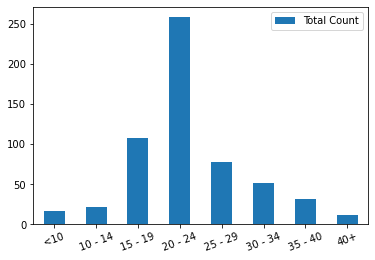

In [54]:
summary_age_demog_df.plot.bar(rot=20)

## Age Demographics (purchase)

The below each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.):

* Purchase Count
* Average Purchase Price
* Total Purchase Value
* Average Purchase Total per Person by Age Group

In [11]:
# Purchase count for each age group
age_purchase_count = age_demog_df.groupby('Age Ranges')['Purchase ID'].count()
age_purchase_count

# Average purchase price for each age group
age_avg_purchase_price = round(age_demog_df.groupby('Age Ranges')['Price'].mean(), 2)
age_avg_purchase_price

# Total purchase value for each age group
age_total_purchase_value = round(age_demog_df.groupby('Age Ranges')['Price'].sum(), 2)
age_total_purchase_value

# Average total purchase value per person for each age group
age_avg_total_purchase_per_person = round(age_total_purchase_value / total_count, 2)
age_avg_total_purchase_per_person

# final df
summary_age_purchasing_analysis_df = pd.DataFrame({'Purchase Count': age_purchase_count
                                                   ,'Avg Purchase Price': age_avg_purchase_price
                                                   ,'Total Purchase Value': age_total_purchase_value
                                                   ,'Avg Total Purchase per Person': age_avg_total_purchase_per_person})

for col in summary_age_purchasing_analysis_df.columns:
    if col != 'Purchase Count':
        summary_age_purchasing_analysis_df[col] = summary_age_purchasing_analysis_df[col].map("${: ,}".format)

summary_age_purchasing_analysis_df


,Purchase Count,Avg Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Ranges,,,,
<10,23,$ 3.35,$ 77.13,$ 4.54
10 - 14,28,$ 2.96,$ 82.78,$ 3.76
15 - 19,136,$ 3.04,$ 412.89,$ 3.86
20 - 24,365,$ 3.05,"$ 1,114.06",$ 4.32
25 - 29,101,$ 2.9,$ 293.0,$ 3.81
30 - 34,73,$ 2.93,$ 214.0,$ 4.12
35 - 40,41,$ 3.6,$ 147.67,$ 4.76
40+,13,$ 2.94,$ 38.24,$ 3.19


## Top Spenders

Identify the the top 5 spenders in the game by total purchase value, then list (in a table):

* SN
* Purchase Count
* Average Purchase Price
* Total Purchase Value

In [12]:
# Copy original_purchase_df to new one
spenders_df = original_purchase_df.copy()

# find purchase value for each player 
spend_total_purchase_value = spenders_df.groupby('SN')['Price'].sum()

# find a count of purchasing items for each player
spend_purchase_count = spenders_df.groupby('SN')['Purchase ID'].count()

# find average purchase price for each players
avg_purchase_price = spend_total_purchase_value / spend_purchase_count

# create a final df
summary_spenders_df = pd.DataFrame({'Purchase Count': spend_purchase_count
                                        , 'Avg Purchase Price': avg_purchase_price 
                                        , 'Total Purchase value': spend_total_purchase_value})


# Sort df by Total Purchase value column 
summary_spenders_df = summary_spenders_df.sort_values(['Total Purchase value'], ascending=False)

for col in summary_spenders_df.columns:
    if col != 'Purchase Count':
        summary_spenders_df[col] = summary_spenders_df[col].map("${: .2f}".format)

# get top 5 spenders (5 is default for .head())
summary_spenders_df.head()

,Purchase Count,Avg Purchase Price,Total Purchase value
SN,,,
Lisosia93,5,$ 3.79,$ 18.96
Idastidru52,4,$ 3.86,$ 15.45
Chamjask73,3,$ 4.61,$ 13.83
Iral74,4,$ 3.40,$ 13.62
Iskadarya95,3,$ 4.37,$ 13.10


## Most Popular Items

Identify the 5 most popular items by purchase count, then list (in a table):

* Item ID
* Item Name
* Purchase Count
* Item Price
* Total Purchase Value

In [13]:
popular_items_df = original_purchase_df.copy()
popular_items_df = popular_items_df[['Item ID', 'Item Name', 'Price']]
popular_items_df = popular_items_df.groupby(['Item ID', 'Item Name'])

# Calculate purchase count, avg item price, total purchase value 
popular_purchase_count = popular_items_df['Item ID'].count()
item_price = popular_items_df['Price'].mean()
total_purchase_value = popular_items_df['Price'].sum()

# Create final df
summary_most_popular_items_df = pd.DataFrame({'Purchase Count': popular_purchase_count
                                            ,'Item Price': item_price
                                            ,'Total Purchase Value': total_purchase_value})

# Sort values
sort_summary_most_popular_items_df = summary_most_popular_items_df.sort_values(['Purchase Count'], ascending=False)

for col in sort_summary_most_popular_items_df.columns:
    if col != 'Purchase Count':
        sort_summary_most_popular_items_df[col] = sort_summary_most_popular_items_df[col].map("${: .2f}".format)
        
sort_summary_most_popular_items_df.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$ 4.61,$ 59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$ 4.23,$ 50.76
145,Fiery Glass Crusader,9,$ 4.58,$ 41.22
132,Persuasion,9,$ 3.22,$ 28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$ 3.53,$ 31.77


## Most Profitable Items

Identify the 5 most profitable items by total purchase value, then list (in a table):

* Item ID
* Item Name
* Purchase Count
* Item Price
* Total Purchase Value

In [14]:
summary_most_profitable_items_df = summary_most_popular_items_df.sort_values(['Total Purchase Value'], ascending=False)

for col in summary_most_profitable_items_df.columns:
    if col != 'Purchase Count':
        summary_most_profitable_items_df[col] = summary_most_profitable_items_df[col].map("${: .2f}".format)

summary_most_profitable_items_df.head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$ 4.61,$ 59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$ 4.23,$ 50.76
82,Nirvana,9,$ 4.90,$ 44.10
145,Fiery Glass Crusader,9,$ 4.58,$ 41.22
103,Singed Scalpel,8,$ 4.35,$ 34.80
